## PageRank as a Markov model

### PageRank: intuition 

- Important webpages are linked from other important webpages.
- Don't just look at the number of links coming to a webpage but consider who the links are coming from 
<center>
<img src="img/wiki_page_rank.jpg" height="500" width="500"> 
</center>

[Credit](https://en.wikipedia.org/wiki/PageRank#/media/File:PageRanks-Example.jpg)


### PageRank: scoring

- Imagine a browser doing a random walk 
    - At time t=0, start at a random webpage.
    - At time t=1, follow a random link on the current page.
    - At time t=2, follow a random link on the current page. 
    
- Intuition
    - In the "steady state" each page has a long-term visit rate, which is the page's score (rank). 

### PageRank: teleporting

- Obvious problem with the random walk:
    - Pages with no in-links have a rank of 0.
    - Algorithm can get "stuck" in part of the graph, as the web is full of dead-ends. 

### PageRank: teleporting

- At a dead end, jump to a random web page.
- At a non-dead end, we still jump to a random web page with probability $\alpha$. 
- With the remaining probability $(1-\alpha)$ go out on a random link. 
- With teleporting, we cannot get stuck locally. 

### Questions

### PageRank as a Markov chain

- A state is a web page
- Transition probabilities represent probabilities of moving from one page to another
- We derive these from the adjacency matrix of the web graph
    - Adjacency matrix $M$ is a $n \times n$ matrix, if $n$ is the number of states (web pages)
    - $M_{ij} = 1$ if there is a hyperlink from page $i$ to page $j$. 

### PageRank: deriving transition matrix

- If a state has no out-links, the random surfer teleports: 
    - the transition probability to each state from this state is $1/n$, if $n$ is the number of states
- If a node has K > 0 outgoing links:
    - with probability $0 \leq \alpha \leq 1$ the surfer teleports to a random node
        - probability is $\alpha/n$
    - with probability $(1-\alpha)$ the surfer takes a normal random walk
        - probability is $(1-\alpha)/K$
    

### PageRank: deriving transition matrix

- If a row has all 0's, replace each element by $1/n$
- Else
    - Normalize: divide each 1 by the number of 1's in the row
    - Multiply the resulting matrix by $(1-\alpha)$
    - Add $\alpha/n$ to every element in the resulting matrix to create the transition matrix $A$.  

### PageRank: deriving transition matrix (example) 

- Adjacency matrix: $
M = 
\begin{bmatrix}
0 & 1 & 0\\
1 & 0 & 1\\
0 & 1 & 0\\    
\end{bmatrix}
, \alpha = 0.0$ 

- Transition matrix: $
A_{\alpha=0} = 
\begin{bmatrix}
0 & 1 & 0\\
0.5 & 0 & 0.5\\
0 & 1 & 0\\    
\end{bmatrix}$



### PageRank: deriving transition matrix (example) 

$
M = 
\begin{bmatrix}
0 & 1 & 0\\
1 & 0 & 1\\
0 & 1 & 0\\    
\end{bmatrix}
, n =3, \alpha = 0.5$ 

Normalize: divide each 1 by the number of 1's in the row:  
$
\begin{bmatrix}
0 & 1 & 0\\
1/2 & 0 & 1/2\\
0 & 1 & 0\\    
\end{bmatrix}$


### PageRank: deriving transition matrix (example) 

$
M = 
\begin{bmatrix}
0 & 1 & 0\\
1 & 0 & 1\\
0 & 1 & 0\\    
\end{bmatrix}
, n =3, \alpha = 0.5$ 

- Normalized
- Multiply the resulting matrix by $(1-\alpha)$: $ (1-0.5)
\begin{bmatrix}
0 & 1 & 0\\
1/2 & 0 & 1/2\\
0 & 1 & 0\\    
\end{bmatrix}$ 
$ =
\begin{bmatrix}
0 & 1/2 & 0\\
1/4 & 0 & 1/4\\
0 & 1/2 & 0\\    
\end{bmatrix}$

- Add $\alpha/n$ to every element in the resulting matrix to create the transition matrix:
$
A_{\alpha = 0.5} = 
\begin{bmatrix}
1/6 & 2/3 & 1/6\\
5/12 & 1/6 & 5/12\\
1/6 & 2/3 & 1/6\\    
\end{bmatrix}$

### Questions

### Calculate page rank

- We have a transition matrix: $A_{\alpha = 0.5} = 
\begin{bmatrix}
1/6 & 2/3 & 1/6\\
5/12 & 1/6 & 5/12\\
1/6 & 2/3 & 1/6\\    
\end{bmatrix}$
- We want to find the stationary distribution
    - Is it irreducible?
    - Is it aperiodic? 
    

### Calculate page rank: power iteration method

- Start with a random initial probability distribution $\pi$
- Multiply $\pi$ by powers of the transition matrix $A$ until the product looks stable 
    - After one step, we are at $\pi A$
    - After two steps, we are at $\pi A^2$
    - After three steps, we are at $\pi A^3$
    - Eventually (for a large $k$), $\pi A^k = \pi$ 

### How to do this in Python? 

- Use [networkx](https://networkx.github.io/documentation/networkx-1.9/index.html) package [google_matrix](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.google_matrix.html) function. Warning: their definition of  𝛼  is opposite from ours.

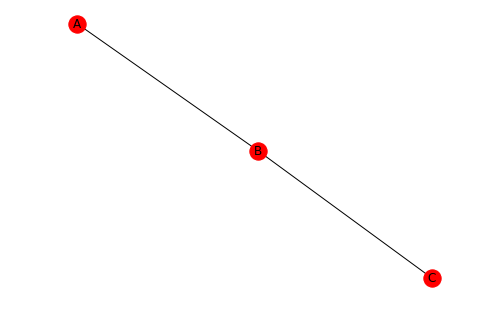

In [12]:
import networkx as nx
G=nx.Graph()
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_edge('A','B')
G.add_edge('B','A')
G.add_edge('B','C')
G.add_edge('C','B')
nx.draw(G, with_labels=True)
plt.show()

In [16]:
# Transition matrix for alpha = 0.0
print(nx.google_matrix(G, nodelist=sorted(G.nodes()), alpha=1.0 - 0.0))

[[0.  1.  0. ]
 [0.5 0.  0.5]
 [0.  1.  0. ]]


In [19]:
# Transition matrix for alpha = 0.5
A = nx.google_matrix(G, nodelist=sorted(G.nodes()), alpha = 1.0 - 0.5)
print(A)

[[0.16666667 0.66666667 0.16666667]
 [0.41666667 0.16666667 0.41666667]
 [0.16666667 0.66666667 0.16666667]]


In [22]:
def print_pi_over_time(s0, T, steps=10):
    prev = s0
    print('Step 0', prev)
    for i in range(steps):    
        current = prev@T
        print('Step ', i+1, current)
        prev = current

In [27]:
# Random initialization of pi
pi = [.4, 0.2, 0.2]
# Power iteration method
print_pi_over_time(pi, A, steps=40)

Step 0 [0.4, 0.2, 0.2]
Step  1 [[0.18333333 0.43333333 0.18333333]]
Step  2 [[0.24166667 0.31666667 0.24166667]]
Step  3 [[0.2125 0.375  0.2125]]
Step  4 [[0.22708333 0.34583333 0.22708333]]
Step  5 [[0.21979167 0.36041667 0.21979167]]
Step  6 [[0.2234375 0.353125  0.2234375]]
Step  7 [[0.22161458 0.35677083 0.22161458]]
Step  8 [[0.22252604 0.35494792 0.22252604]]
Step  9 [[0.22207031 0.35585937 0.22207031]]
Step  10 [[0.22229818 0.35540365 0.22229818]]
Step  11 [[0.22218424 0.35563151 0.22218424]]
Step  12 [[0.22224121 0.35551758 0.22224121]]
Step  13 [[0.22221273 0.35557454 0.22221273]]
Step  14 [[0.22222697 0.35554606 0.22222697]]
Step  15 [[0.22221985 0.3555603  0.22221985]]
Step  16 [[0.22222341 0.35555318 0.22222341]]
Step  17 [[0.22222163 0.35555674 0.22222163]]
Step  18 [[0.22222252 0.35555496 0.22222252]]
Step  19 [[0.22222207 0.35555585 0.22222207]]
Step  20 [[0.2222223  0.35555541 0.2222223 ]]
Step  21 [[0.22222219 0.35555563 0.22222219]]
Step  22 [[0.22222224 0.35555552 0.

### Modern ranking methods are more advanced:

- Guarding against methods that exploit algorithm.
- Removing offensive/illegal content.
- Supervised and personalized ranking methods.
- Take into account that you often only care about top rankings.
- Also work on diversity of rankings:
- E.g., divide objects into sub-topics and do weighted "covering" of topics.
- Persistence/freshness as in recommender systems (news articles).